In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('C:\\Users\\sudhakar\\Downloads\\winequality-white.csv',sep=';',names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df.drop(0,inplace=True)

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


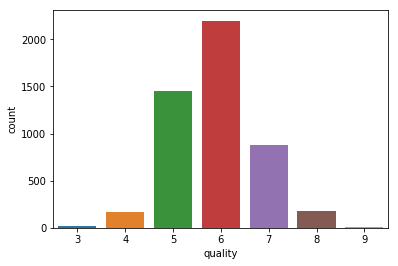

In [3]:
sns.countplot(df['quality'])

In [4]:
def th(a):
    if a == 3:
        return 4
    elif a == 4:
        return 4
    elif a==5: 
        return 4
    elif a==6:
        return 4
    elif a==7:
        return 8
    elif a==8:
        return 8
    elif a == 9:
        return 8
df['quality'] = df['quality'].apply(int)

In [5]:
df['target'] = df['quality'].apply(th)

In [6]:
df['target'].head()

1    4
2    4
3    4
4    4
5    4
Name: target, dtype: int64

In [7]:
df.drop('quality',inplace=True,axis=1)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,4
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,4
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,4
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,4
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,4


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size = 0.3)

In [11]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
svm = SVC()
svm.fit(x_train,y_train)
predicts = svm.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
print('Logis')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('svm')
print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts))

Logis
[[1104   50]
 [ 239   77]]
             precision    recall  f1-score   support

          4       0.82      0.96      0.88      1154
          8       0.61      0.24      0.35       316

avg / total       0.78      0.80      0.77      1470

svm
[[1116   38]
 [ 226   90]]
             precision    recall  f1-score   support

          4       0.83      0.97      0.89      1154
          8       0.70      0.28      0.41       316

avg / total       0.80      0.82      0.79      1470



In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [17]:
grid_search = GridSearchCV(SVC(),param_grid=param_grid)

In [18]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
pre = grid_search.predict(x_test)

In [24]:
print('SVC using GridSearchCV')
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre))

SVC using GridSearchCV
[[1154    0]
 [ 224   92]]
             precision    recall  f1-score   support

          4       0.84      1.00      0.91      1154
          8       1.00      0.29      0.45       316

avg / total       0.87      0.85      0.81      1470



(3428, 11)